<a href="https://colab.research.google.com/github/KevinMartinez1999/Machine_Learning/blob/develop/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Datos
datos = 0
if datos == 0:
    X1 = np.array([0.3, 0.42, 0.5, 0.4, 0.1, 0.35, 0.4, 0.55, 0.24, 0.1, 0.33, 0.45, 0.52, 0.43, 0.05, 0.3, 0.44, 0.5, 0.2, 0.1, 0.3])
    X2 = np.array([0.14, 0.7, 0.5, 0.3, 0.12, 0.31, 0.5, 0.52, 0.44, 0.2, 0.1, 0.6, 0.42, 0.35, 0.17, 0.36, 0.4, 0.5, 0.4, 0.25, 0.6])
    #y = np.array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0])
    y = np.array([0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 1])
else:
    tam = 100
    Clases = 2
    X1 = np.random.rand(1, tam)
    X2 = np.random.rand(1, tam)
    y = np.random.randint(Clases, size = tam)
    X1 = X1[0]
    X2 = X2[0]

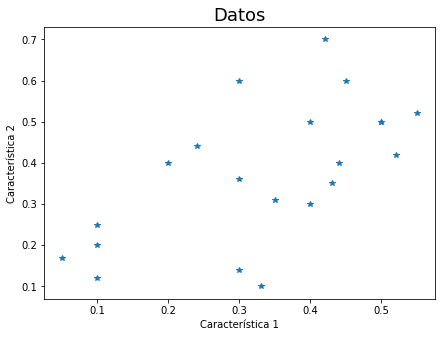

In [3]:
plt.figure(figsize=(7, 5))
plt.title('Datos', fontsize = 18)
plt.plot(X1, X2, '*')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

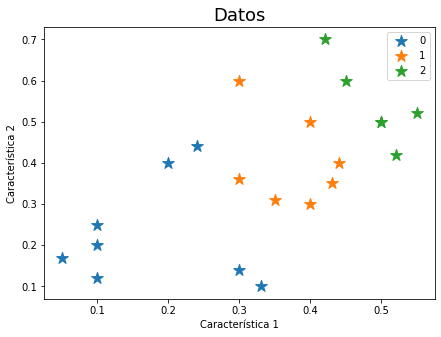

In [4]:
num_clusters = 3
cent_init = np.empty([num_clusters, 2])

plt.figure(figsize=(7, 5))
plt.title('Datos', fontsize = 18)
cont = 0
for g in np.unique(y):
    ix = np.where(y == g)
    xmean = np.mean(X1[ix])
    ymean = np.mean(X2[ix])
    cent_init[cont] = [xmean, ymean]
    cont += 1
    plt.scatter(X1[ix], X2[ix], label = g, s = 150, marker = '*')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [5]:
X = np.transpose(np.array([X1,X2]))

In [6]:
model = KMeans(n_clusters = num_clusters, init = cent_init)
model.fit(X)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[0.1775    , 0.2275    ],
       [0.37428571, 0.40285714],
       [0.49      , 0.54      ]]),
       n_clusters=3)

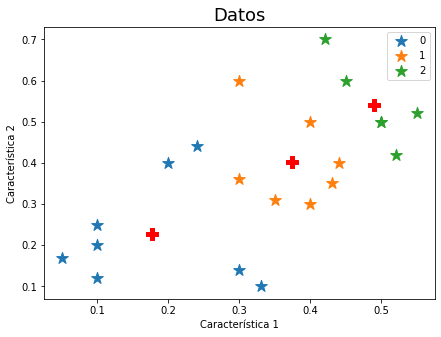

In [7]:
from matplotlib import colors
plt.figure(figsize=(7, 5))
plt.title('Datos', fontsize = 18)
for g in np.unique(y):
    ix = np.where(y == g)
    plt.scatter(X1[ix], X2[ix], label = g, s = 150, marker = '*')
for j in range(num_clusters):
  plt.scatter(cent_init[j][0], cent_init[j][1], s = 150, marker = 'P', color = 'red')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [8]:
model.labels_

array([0, 2, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2],
      dtype=int32)

In [9]:
centers = model.cluster_centers_

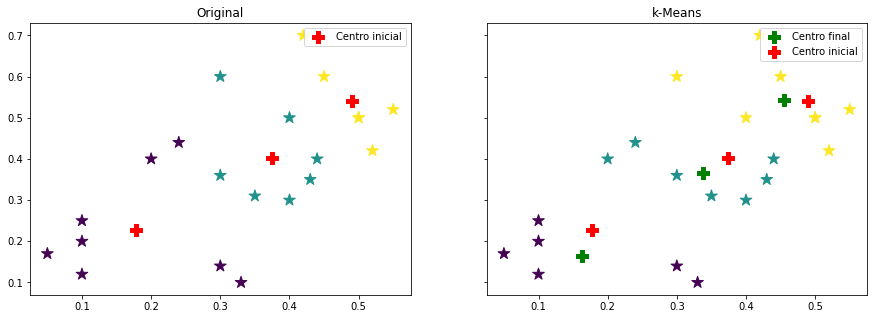

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (15, 5))
ax1.scatter(cent_init[:, 0], cent_init[:, 1], label = 'Centro inicial', s = 150, marker = 'P', color = 'red')
ax1.set_title('Original')
ax1.scatter(X[:,0], X[:,1], c=y, s = 150, marker = '*')
ax1.legend()

ax2.scatter(centers[:, 0], centers[:, 1], label = 'Centro final', s = 150, marker = 'P', color = 'green')
ax2.scatter(cent_init[:, 0], cent_init[:, 1], label = 'Centro inicial', s = 150, marker = 'P', color = 'red')
ax2.set_title('k-Means')
ax2.scatter(X[:,0], X[:,1], c=model.labels_, s = 150, marker = '*')
ax2.legend()

### Añadiendo un nuevo valor

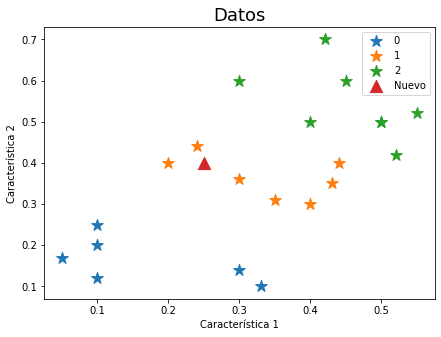

Clase: [1]


In [11]:
nuevo_dato = np.array([[0.25, 0.4]])

plt.figure(figsize=(7, 5))
plt.title('Datos', fontsize = 18)
for g in np.unique(model.labels_):
  ix = np.where(model.labels_ == g)
  plt.scatter(X1[ix], X2[ix], label = g, s = 150, marker = '*')
plt.scatter(nuevo_dato[:, 0], nuevo_dato[:, 1], label = 'Nuevo', s = 150, marker = '^')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

#Calcular clase y probabilidades
print("Clase:", model.predict(nuevo_dato))